In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [9]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [11]:
digits.target[1]

1

In [19]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

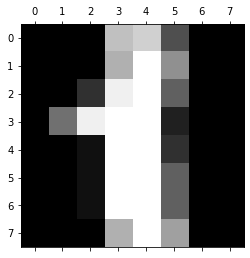

In [26]:
plt.gray()
plt.matshow(digits.images[1])

## Spliting the data in training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(digits["data"],digits.target,train_size=0.8)

In [34]:
len(X_train)

1437

In [35]:
len(X_test)

360

# 1)Model of Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier(n_estimators=27,random_state=10)

In [123]:
modelRFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [124]:
modelRFC.predict([digits.data[166]])

array([0])

In [125]:
digits.target[166]

0

In [126]:
modelRFC.score(X_train,y_train)

1.0

In [127]:
modelRFC.score(X_test,y_test)

0.9722222222222222

In [136]:
y_predictedRFC=modelRFC.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix,classification_report

In [137]:
cmRFC=confusion_matrix(y_test,y_predicted)
cmRFC

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

In [138]:
print(classification_report(y_test,y_predictedRFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      1.00      0.95        40
           2       1.00      0.97      0.99        34
           3       1.00      0.90      0.95        42
           4       1.00      1.00      1.00        35
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        36
           8       0.97      0.94      0.95        33
           9       0.95      0.97      0.96        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Random Forest gives 0.97 accuracy

In [159]:
import pickle
with open("ModelRFC","wb") as f:
    pickle.dump(modelRFC,f)

# 2)Model for Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression(random_state=10)

In [148]:
modelLR.fit(X_train,y_train)

C:\Users\parineeta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\parineeta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
modelLR.predict([digits.data[166]])

array([0])

In [154]:
digits.target[166]

0

In [151]:
modelLR.score(X_train,y_train)

0.9951287404314544

In [152]:
modelLR.score(X_test,y_test)

0.9666666666666667

In [155]:
y_predictedLR=modelLR.predict(X_test)

In [156]:
cmLR=confusion_matrix(y_test,y_predictedLR)

In [157]:
cmLR

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]], dtype=int64)

In [158]:
print(classification_report(y_test,y_predictedLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      0.97      0.95        40
           2       1.00      1.00      1.00        34
           3       1.00      0.93      0.96        42
           4       1.00      0.97      0.99        35
           5       0.93      0.93      0.93        30
           6       0.97      1.00      0.99        37
           7       1.00      0.94      0.97        36
           8       0.94      0.91      0.92        33
           9       0.90      1.00      0.95        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Accuracy of Logistic Regression is 0.97

In [160]:
with open("ModelLR","wb") as f:
    pickle.dump(modelLR,f)